In [1]:
import os, shutil
# 整理划分一批小的数据集（下面这段代码只是用来划分一批小的数据集）
original_dataset_dir = '/home/mzl/pytorch0.4.1/pytorch-book/chapter6-实战指南/data/train'
base_dir = '/home/mzl/tf-test/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
    
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
from keras import layers
from keras import models
# 搭建一个模型
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

/home/mzl/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers
# 配置模型
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 使用 ImageDataGenerator 从目录中读取图像
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) # 将所有图像乘以 1/255 缩放
train_generator = train_datagen.flow_from_directory( 
        train_dir, #目标目录
        target_size=(150, 150), #将所有图像的大小调整为 150×150
        batch_size=20, 
        class_mode='binary') # 因为使用了 binary_crossentropy 损失,所以需要用二进制标签
validation_generator = test_datagen.flow_from_directory( 
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# 利用批量生成器拟合模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 27s 265ms/step - loss: 0.6858 - acc: 0.5580 - val_loss: 0.6726 - val_acc: 0.5480
Epoch 2/30
100/100 [==============================] - 27s 269ms/step - loss: 0.6580 - acc: 0.6155 - val_loss: 0.6396 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 27s 275ms/step - loss: 0.6075 - acc: 0.6750 - val_loss: 0.6164 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 29s 293ms/step - loss: 0.5754 - acc: 0.7035 - val_loss: 0.6729 - val_acc: 0.5960
Epoch 5/30
100/100 [==============================] - 29s 288ms/step - loss: 0.5497 - acc: 0.7170 - val_loss: 0.5868 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 34s 345ms/step - loss: 0.5253 - acc: 0.7375 - val_loss: 0.6099 - val_acc: 0.6620
Epoch 7/30
100/100 [==============================] - 30s 299ms/step - loss: 0.5053 - acc: 0.7515 - val_lo

In [4]:
model.save('cats_and_dogs_small_1.h5') # 模型保存

In [5]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [6]:
# 利用 ImageDataGenerator 来设置数据增强
datagen = ImageDataGenerator(
    rotation_range=40, # rotation_range 是角度值(在 0~180 范围内),表示图像随机旋转的角度范围
    width_shift_range=0.2,  # width_shift 和 height_shift 是图像在水平 
    height_shift_range=0.2, # 或垂直方向上平移的范围(相对于总宽度或总高度的比例)
    shear_range=0.2, # shear_range 是随机错切变换的角度
    zoom_range=0.2, # 是图像随机缩放的范围
    horizontal_flip=True, # horizontal_flip 是随机将一半图像水平翻转
    fill_mode='nearest') # 是用于填充新创建像素的方法,这些新像素可能来自于旋转或宽度 / 高度平移。

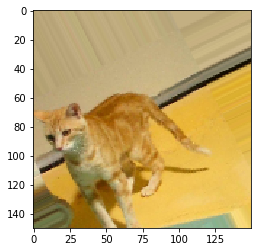

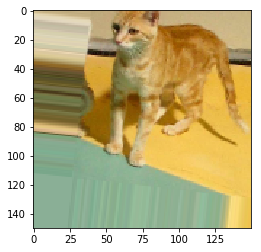

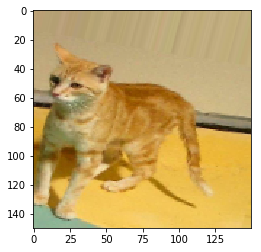

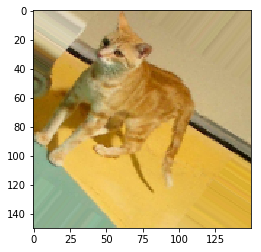

In [7]:
# 显示几个随机增强后的训练图像
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]

img_path = fnames[6] # 选择一张图像进行增强
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # 读取图像并调整大小将其转换为形状 (150, 150, 3) 的 Numpy 数组
x = x.reshape((1,) + x.shape) #将其形状改变为 (1, 150, 150, 3)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [8]:
# 定义一个包含 dropout 的新卷积神经网络
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

In [9]:
# 利用数据增强生成器训练卷积神经网络
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255) # 注意,不能增强验证数据
train_generator = train_datagen.flow_from_directory(
        train_dir, #目标目录
        target_size=(150, 150), #将所有图像的大小调整为 150×150
        batch_size=32,
        class_mode='binary') # 因为使用了 binary_crossentropy 损失,所以需要用二进制标签

validation_generator = test_datagen.flow_from_directory( 
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 55s 549ms/step - loss: 0.6908 - acc: 0.5250 - val_loss: 0.6806 - val_acc: 0.6041
Epoch 2/100
100/100 [==============================] - 48s 479ms/step - loss: 0.6814 - acc: 0.5666 - val_loss: 0.6617 - val_acc: 0.6117
Epoch 3/100
100/100 [==============================] - 49s 492ms/step - loss: 0.6663 - acc: 0.5966 - val_loss: 0.6697 - val_acc: 0.5736
Epoch 4/100
100/100 [==============================] - 59s 586ms/step - loss: 0.6546 - acc: 0.6084 - val_loss: 0.6443 - val_acc: 0.6155
Epoch 5/100
100/100 [==============================] - 48s 481ms/step - loss: 0.6466 - acc: 0.6253 - val_loss: 0.6317 - val_acc: 0.6250
Epoch 6/100
100/100 [==============================] - 51s 513ms/step - loss: 0.6321 - acc: 0.6416 - val_loss: 0.6139 - val_acc: 0.6491
Epoch 7/100
100/100 [==============================] - 49s 487ms/step - loss: 0.6198 - acc: 0.6491 -

100/100 [==============================] - 50s 496ms/step - loss: 0.4279 - acc: 0.7969 - val_loss: 0.4349 - val_acc: 0.8001
Epoch 61/100
100/100 [==============================] - 49s 489ms/step - loss: 0.4263 - acc: 0.8050 - val_loss: 0.4757 - val_acc: 0.7792
Epoch 62/100
100/100 [==============================] - 50s 496ms/step - loss: 0.4121 - acc: 0.8162 - val_loss: 0.5413 - val_acc: 0.7589
Epoch 63/100
100/100 [==============================] - 47s 466ms/step - loss: 0.4142 - acc: 0.8091 - val_loss: 0.4357 - val_acc: 0.7982
Epoch 64/100
100/100 [==============================] - 49s 487ms/step - loss: 0.4306 - acc: 0.7975 - val_loss: 0.4186 - val_acc: 0.8090
Epoch 65/100
100/100 [==============================] - 47s 467ms/step - loss: 0.4126 - acc: 0.8081 - val_loss: 0.4652 - val_acc: 0.7951
Epoch 66/100
100/100 [==============================] - 46s 460ms/step - loss: 0.4043 - acc: 0.8150 - val_loss: 0.4960 - val_acc: 0.7874
Epoch 67/100
100/100 [==============================] 

In [10]:
 # 保存模型
model.save('cats_and_dogs_small_2.h5')

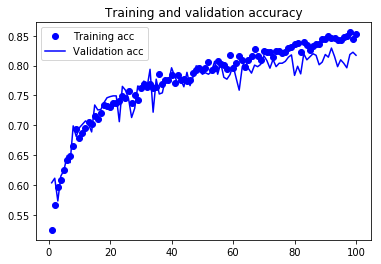

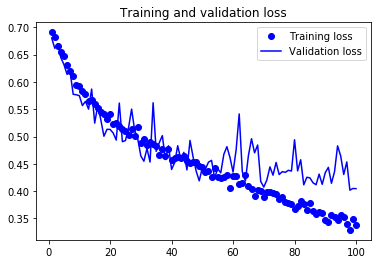

In [11]:
# 再次绘制训练过程中的损失曲线和精度曲线
# 使用了数据增强和 dropout 之后,模型不再过拟合:
# 训练曲线紧紧跟随着验证曲线
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [43]:
# 使用在 ImageNet 上训练的 VGG16 网络的卷积基从
# 猫狗图像中提取有趣的特征,然后在这些特征上训练一个猫狗分类器
from keras.applications import VGG16
conv_base = VGG16(
        weights='imagenet', # weights 指定模型初始化的权重检查点
# include_top 指定模型最后是否包含密集连接分类器。默认情况下,这个密集连接分
# 类器对应于 ImageNet 的 1000 个类别。因为我们打算使用自己的密集连接分类器(只有
# 两个类别: cat 和 dog ),所以不需要包含它
        include_top=False,
        input_shape=(150, 150, 3)) # input_shape 是输入到网络中的图像张量的形状。
                                   # 这个参数完全是可选的,如果不传
                                   # 入这个参数,那么网络能够处理任意形状的输入

conv_base.summary() # VGG16 卷积基的详细架构如下所示

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [13]:
#常识：深度学习中更靠近底部的层是指在定义模型时先添加到模型中的层,而更靠近顶部的层则是后添加到模型中的层
# 使用预训练的卷积基提取特征
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/home/mzl/tf-test/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
            directory,
            target_size=(150, 150),
            batch_size=batch_size, 
            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count: # 注意,这些生成器在循环中不断
            break                          # 生成数据,所以你必须在读取完
    return features, labels                # 所有图像后终止循环
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

# 目前,提取的特征形状为 (samples, 4, 4, 512) ，我们要将其输入到密集连接分类器中,
# 所以首先必须将其形状展平为 (samples, 8192)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
# 定义并训练密集连接分类器
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
        loss='binary_crossentropy',
        metrics=['acc'])
history = model.fit(train_features, train_labels,
        epochs=30,
        batch_size=20,
        validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.6249 - acc: 0.6505 - val_loss: 0.4386 - val_acc: 0.8420
Epoch 2/30
2000/2000 [==============================] - 2s 928us/step - loss: 0.4388 - acc: 0.8020 - val_loss: 0.3595 - val_acc: 0.8570
Epoch 3/30
2000/2000 [==============================] - 2s 950us/step - loss: 0.3507 - acc: 0.8545 - val_loss: 0.3200 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 2s 914us/step - loss: 0.3131 - acc: 0.8720 - val_loss: 0.3149 - val_acc: 0.8610
Epoch 5/30
2000/2000 [==============================] - 2s 929us/step - loss: 0.2799 - acc: 0.8895 - val_loss: 0.2785 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 2s 921us/step - loss: 0.2590 - acc: 0.8895 - val_loss: 0.2688 - val_acc: 0.8910
Epoch 7/30
2000/2000 [==============================] - 2s 931us/step - loss: 0.2388 - acc: 0.9100 - val_loss: 0.2591 - val_acc: 0.8950
Ep

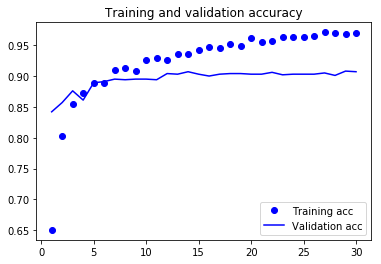

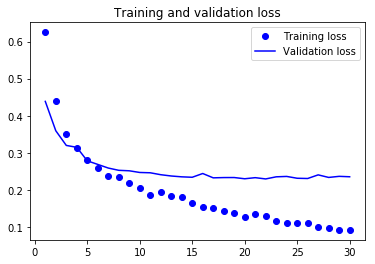

In [30]:
# 绘制结果
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# 但从图中也可以看出,虽然 dropout 比率相当大,但模型几乎从一开始就过拟合
# 这是因为本方法没有使用数据增强,而数据增强对防止小型图像数据集的过拟合非常重要

In [44]:
# 在卷积基上添加一个密集连接分类器
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [45]:
# 在编译和训练模型之前,一定要“冻结”卷积基。冻结(freeze)一个或多个层是指在训练
# 过程中保持其权重不变，如果不这么做,那么卷积基之前学到的表示将会在训练过程中被修改
# 因为其上添加的 Dense 层是随机初始化的,所以非常大的权重更新将会在网络中传播,对之前
# 学到的表示造成很大破坏
# 在 Keras 中,冻结网络的方法是将其 trainable 属性设为 False
conv_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(model.trainable_weights))
# 如此设置之后,只有添加的两个 Dense 层的权重才会被训练。总共有 4 个权重张量,每层
# 个(主权重矩阵和偏置向量)。注意,为了让这些修改生效,你必须先编译模型。如果在编译
# 之后修改了权重的 trainable 属性,那么应该重新编译模型,否则这些修改将被忽略。

This is the number of trainable weights after freezing the conv base: 4


In [37]:
# 利用冻结的卷积基端到端地训练模型
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # 注意,不能增强验证数据

train_generator = train_datagen.flow_from_directory(
        train_dir, # 目标目录
        target_size=(150, 150), # 将所有图像的大小调整为 150×150
        batch_size=20,
        class_mode='binary') # 因为使用了 binary_crossentropy 损失,所以需要用二进制标签

validation_generator = test_datagen.flow_from_directory( 
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=2e-5),
        metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 69s 688ms/step - loss: 0.3165 - acc: 0.8960 - val_loss: 0.1824 - val_acc: 0.9250
Epoch 2/30
100/100 [==============================] - 72s 722ms/step - loss: 0.1101 - acc: 0.9790 - val_loss: 0.1526 - val_acc: 0.9330
Epoch 3/30
100/100 [==============================] - 88s 879ms/step - loss: 0.0645 - acc: 0.9890 - val_loss: 0.1575 - val_acc: 0.9340
Epoch 4/30
100/100 [==============================] - 94s 942ms/step - loss: 0.0471 - acc: 0.9910 - val_loss: 0.1497 - val_acc: 0.9410
Epoch 5/30
100/100 [==============================] - 88s 880ms/step - loss: 0.0395 - acc: 0.9910 - val_loss: 0.1517 - val_acc: 0.9380
Epoch 6/30
100/100 [==============================] - 101s 1s/step - loss: 0.0347 - acc: 0.9930 - val_loss: 0.1550 - val_acc: 0.9430
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.0290 - acc: 0.9915 - val_loss: 

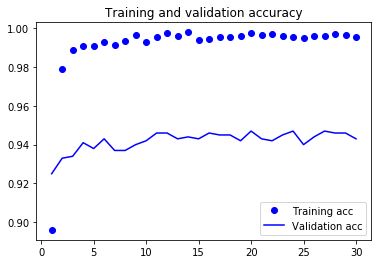

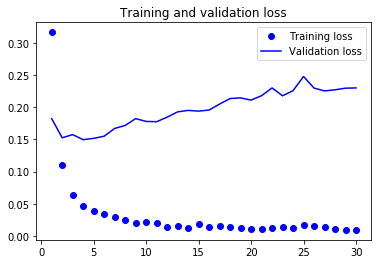

In [38]:
# 绘制训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
# 我们来再次绘制结果,如你所见,验证精度约为 96%,这比从头开
# 始训练的小型卷积神经网络要好得多。
# 另一种广泛使用的模型复用方法是模型微调(fine-tuning),与特征提取互为补充。对于用
# 于特征提取的冻结的模型基,微调是指将其顶部的几层“解冻”,并将这解冻的几层和新增加的
# 部分(本例中是全连接分类器)联合训练(见图 5-19)。之所以叫作微调,是因为它只是略微调
# 整了所复用模型中更加抽象的表示,以便让这些表示与手头的问题更加相关
# 微调网络的步骤如下。
# (1) 在已经训练好的基网络(base network)上添加自定义网络。
# (2) 冻结基网络。
# (3) 训练所添加的部分。
# (4) 解冻基网络的一些层。
# (5) 联合训练解冻的这些层和添加的部分
# 做特征提取时已经完成了前三个步骤。我们继续进行第四步:先解冻 conv_base ,然
# 后冻结其中的部分层。

In [39]:
# 冻结直到某一层的所有层
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [40]:
# 现在你可以开始微调网络,我们将使用学习率非常小的 RMSProp 优化器来实现。之所以让
# 学习率很小,是因为对于微调的三层表示,我们希望其变化范围不要太大。太大的权重更新可
# 能会破坏这些表示
# 微调模型
model.compile(loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-5),
        metrics=['acc'])
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)

Epoch 1/100
100/100 [==============================] - 98s 975ms/step - loss: 0.0217 - acc: 0.9910 - val_loss: 0.2386 - val_acc: 0.9450
Epoch 2/100
100/100 [==============================] - 114s 1s/step - loss: 0.0161 - acc: 0.9955 - val_loss: 0.2977 - val_acc: 0.9330
Epoch 3/100
100/100 [==============================] - 108s 1s/step - loss: 0.0264 - acc: 0.9905 - val_loss: 0.3121 - val_acc: 0.9290
Epoch 4/100
100/100 [==============================] - 120s 1s/step - loss: 0.0166 - acc: 0.9930 - val_loss: 0.2399 - val_acc: 0.9390
Epoch 5/100
100/100 [==============================] - 111s 1s/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.4014 - val_acc: 0.9170
Epoch 6/100
100/100 [==============================] - 111s 1s/step - loss: 0.0281 - acc: 0.9890 - val_loss: 0.2329 - val_acc: 0.9420
Epoch 7/100
100/100 [==============================] - 110s 1s/step - loss: 0.0176 - acc: 0.9945 - val_loss: 0.3036 - val_acc: 0.9350
Epoch 8/100
100/100 [==============================] - 117s 

Epoch 62/100
100/100 [==============================] - 120s 1s/step - loss: 0.0077 - acc: 0.9970 - val_loss: 0.3154 - val_acc: 0.9490
Epoch 63/100
100/100 [==============================] - 119s 1s/step - loss: 0.0113 - acc: 0.9955 - val_loss: 0.2886 - val_acc: 0.9390
Epoch 64/100
100/100 [==============================] - 118s 1s/step - loss: 0.0145 - acc: 0.9955 - val_loss: 0.3699 - val_acc: 0.9370
Epoch 65/100
100/100 [==============================] - 120s 1s/step - loss: 0.0117 - acc: 0.9955 - val_loss: 0.3575 - val_acc: 0.9450
Epoch 66/100
100/100 [==============================] - 119s 1s/step - loss: 0.0093 - acc: 0.9960 - val_loss: 0.3718 - val_acc: 0.9440
Epoch 67/100
100/100 [==============================] - 116s 1s/step - loss: 0.0069 - acc: 0.9980 - val_loss: 0.3476 - val_acc: 0.9400
Epoch 68/100
100/100 [==============================] - 116s 1s/step - loss: 0.0181 - acc: 0.9950 - val_loss: 0.3810 - val_acc: 0.9450
Epoch 69/100
100/100 [==============================] -

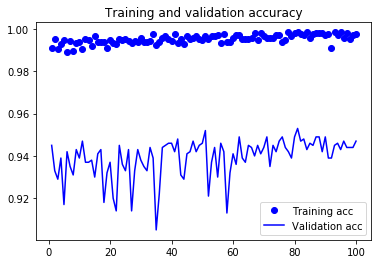

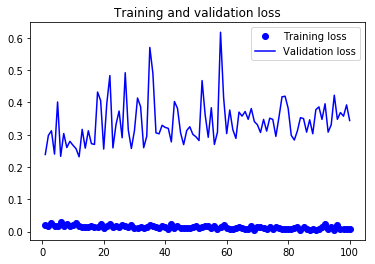

In [41]:
# 绘图代码来绘制结果
# 再次绘制训练过程中的损失曲线和精度曲线
# 使用了数据增强和 dropout 之后,模型不再过拟合:
# 训练曲线紧紧跟随着验证曲线
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

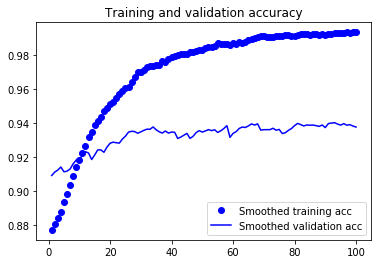

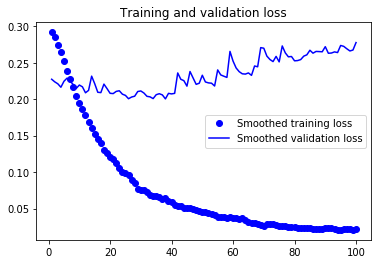

In [25]:
# 这些曲线看起来包含噪声。为了让图像更具可读性,你可以将每个损失和精度都替换为指数
# 移动平均值,从而让曲线变得平滑。下面用一个简单的实用函数来实现
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# 验证精度曲线变得更清楚。可以看到,精度值提高了 1%,从约 96% 提高到 97% 以上

In [42]:
# 现在,你可以在测试数据上最终评估这个模型。
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9379999923706055


In [ ]:
# 最终我们得到了 93.79% 的测试精度
# 注意我们只用一小部分训练数据(约 10%)
# 训练 20 000 个样本与训练 2000 个样本是有很大差别的!